In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.animation as animation


# Pendulo Amortecido

$  \frac{d^2 \theta (t)}{dt^2} + b \frac{d \theta}{dt}(t) + \frac{g}{l} \sin(\theta(t)) = 0$

$ \frac{d \theta}{dt} = \omega$


$ \frac{d \omega}{dt}(t) + b \omega (t) + c \sin(\theta(t)) = 0$

## Solução por integração numérica da equação diferencial

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

In [2]:
# Equ differencial y[0] = theta , y[1] = omega
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

In [3]:
#constante de amortecimento:
b = 0.25
G = 9.8  # acceleration due to gravity, in m/s^2
L = 1.73  # length of pendulum in m
#initial conditions, phase, angular speed
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)

In [4]:
sol = odeint(pend, y0, t, args=(b, G/L))

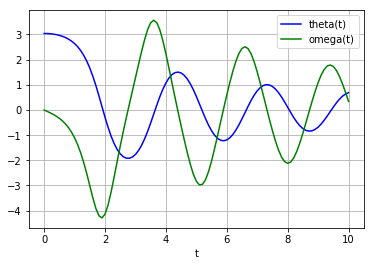

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)#, autoscale_on=False, xlim=(-1, 1), ylim=(-2, 0.1))

ax.plot(t, sol[:, 0], 'b', label='theta(t)')
ax.plot(t, sol[:, 1], 'g', label='omega(t)')
ax.legend(loc='best')
ax.set_xlabel('t')
ax.grid()
plt.show()

In [1]:
%matplotlib notebook
x1 = L*np.sin(sol[:, 0])
y1 = -L*np.cos(sol[:, 0])

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 1), ylim=(-2, 0.1))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [0, x1[i]]
    thisy = [0, y1[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                              interval=25, blit=True, init_func=init)

# ani.save('simple_pendulum.mp4', fps=15)
plt.show()

NameError: name 'L' is not defined

## Tempo de Reação

In [4]:
distQueda=np.array([0.19, 0.16, 0.13, 0.19, 0.145, 0.12 , 0.13, 0.08, 0.14, 0.075, 0.15, 0.12, 0.16, 
                    0.06, 0.03])
distQuedaMed=np.average(distQueda)
distQuedaDesvPad=np.std(distQueda, ddof=1)
#
g=9.80
tReac=np.sqrt(2*distQuedaMed / g) 
tReacDesvPad = tReac/2/distQuedaMed * distQuedaDesvPad
print("distQuedaMed= %.3f m" %distQuedaMed)
print("tReacMedio= %.3f s" %tReac)
print("tReacDesvPad= %.3f s" %tReacDesvPad)

distQuedaMed= 0.125 m
tReacMedio= 0.160 s
tReacDesvPad= 0.030 s


$$T_0 = \frac{2 \pi}{\omega_0} = 2\pi\; \sqrt{\frac{l}{g}} \quad  \text{, para }	\theta_0 \ll 1 \, \mathrm{rad}.
$$

$$ L = g T_0^2 / 4\pi^2 $$


## Medidas Experimentais com Cronometro

In [29]:
L=np.array([1.15, 1.304, 1.63, 1.884])
Periodo =np.array([2.072, 2.325, 2.541, 2.704])

In [30]:
slope, intercept, r_value, p_value, std_err = stats.linregress(Periodo**2/4/np.pi**2, L)
print("slope:%g" %slope)
print("intercept:%g V" %intercept)
#print 'Vel= %g' %Var
#print("slope:", slope)
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope std_err:%g" %std_err)

slope:9.80449
intercept:0.0349819 V
r-squared: 0.972454556205
p_value: 0.0138688950221
slope std_err:1.16681


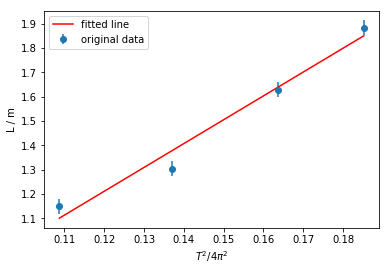

In [33]:
plt.errorbar(Periodo**2/4/np.pi**2, L,  yerr=0.03, fmt='o', label='original data')

plt.plot(Periodo**2/4/np.pi**2, intercept + slope*Periodo**2/4/np.pi**2, 'r', label='fitted line')
plt.legend()
plt.xlabel('$T^2 / 4 \pi^2$')
plt.ylabel('L / m')
plt.show()

In [24]:
g  = L / Periodo**2 * np.pi**2 * 4
g

array([ 10.57494397,   9.52338658,   9.96639306,  10.17248974])

## Medidas Experimentais com Barreira Digital

In [62]:
arr=np.genfromtxt('Files/pendulo.txt')

In [63]:
time=arr[:,1]*1e-3
period=arr[:,3]*1e-6
vel=0.02/(arr[:,5]*1e-6)
energia=vel**2

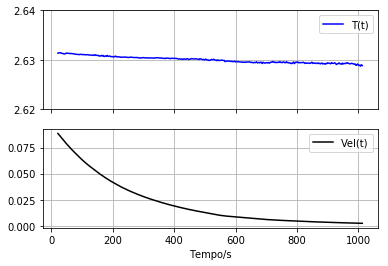

In [64]:
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(211, autoscale_on=False, xlim=(0, 1500), ylim=(2.62, 2.64))
ax2 = fig.add_subplot(212, sharex=ax1) #, autoscale_on=False, xlim=(-1, 1), ylim=(-1, 1))

#ax1.plot(theta, y,label='Emitido-CH1')
ax1.plot(time,period, 'b', label='T(t)')
ax1.grid()
ax1.legend(loc='upper right')
ax2.plot(time,vel**2, 'k', label='Vel(t)')
# make these tick labels invisible
plt.setp(ax1.get_xticklabels(), visible=False)
ax2.legend(loc='best')
ax2.set_xlabel('Tempo/s')
ax2.grid()
plt.show()
#arr

$T=2 \pi \sqrt{\frac{l}{g}}$  
$g_{exp}=\frac{ 4 \pi^2 l}{T^2} $

In [65]:
period_med=period.mean()
period_std=period.std( ddof=1)
gexp= np.pi**2 * 4 * L / period_med**2  

## Incerteza Experimental

$\delta  g_{exp} = \frac{ 4 \pi^2 }{T^2} \cdot \delta  l + \frac{ 8 \pi^2 l}{T^3}   \cdot \delta  T  $

In [66]:
dL=0.01
dgexp= np.pi**2 * 4  / period_med**2 * dL + 8* np.pi**2 * L / period_med**3 *period_std
print("gexp:%g +- %g " % (gexp, dgexp))

gexp:9.874 +- 0.0620152 


Ajuste à Energia  $\Large{f(x) = a e^{-bx} + c}$

In [67]:
def f(x, a, b, c):
    return a*np.exp(-b*x)+c

In [68]:
guess = [0.03, 1.0e-3, 0.1]
popt, pcov = curve_fit(f, time, energia, p0=guess)
#The optimised parameters of the fit
print("popt: a=%g, b=%g, c=%g" %(popt[0], popt[1], popt[2]))
#One standard deviation errors on the parameters.
perr = np.sqrt(np.diag(pcov))
print("perr:", perr)
#The covariance matrix of the parameters
print("pcov:", pcov)
print("Time constant: %g s" %(1.0/popt[1]))
# Time "constant" 1.0/popt[1]

popt: a=0.0951714, b=0.00424509, c=0.00117423
perr: [  5.03337866e-05   5.05848924e-06   2.42364481e-05]
pcov: [[  2.53349007e-09   1.20143503e-10   4.63323455e-11]
 [  1.20143503e-10   2.55883134e-11   9.99112632e-11]
 [  4.63323455e-11   9.99112632e-11   5.87405415e-10]]
Time constant: 235.566 s


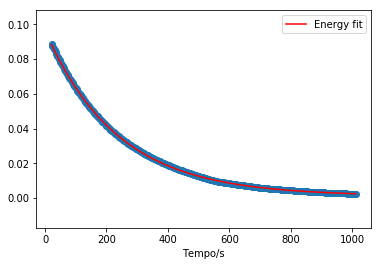

In [69]:
plt.scatter(time, energia)
#strlabel = r'$R^2 = %0.3f$' % Rsq
plt.plot(time, f(time, *popt), color='red', label='Energy fit')
plt.xlabel('Energia / u.a.')
plt.legend()
plt.xlabel('Tempo/s')
plt.show()

## Histograma das medidas do periodo

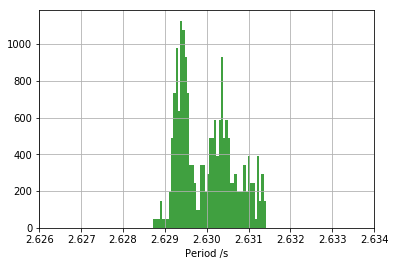

In [58]:
# the histogram of the data
n, bins, patches = plt.hist(period, bins=50, normed='True', facecolor='green', alpha=0.75)
plt.grid(True)
plt.xlim([2.626, 2.634])
plt.xlabel('Period /s')
#plt.ylabel('Probability')
plt.show()